## Working with Maidenhead in Vgrid DGGS

[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeoshub/vgrid/blob/main/docs/notebooks/15_maidenhead.ipynb)
[![image](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/opengeoshub/vgrid/HEAD?filepath=docs/notebooks/15_maidenhead.ipynb)
[![image](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/opengeoshub/vgrid/blob/main/docs/notebooks/15_maidenhead.ipynb)
[![image](https://jupyterlite.rtfd.io/en/latest/_static/badge.svg)](https://demo.gishub.vn/lab/index.html?path=notebooks/vgrid/15_maidenhead.ipynb)

Full Vgrid DGGS documentation is available at [vgrid document](https://vgrid.gishub.vn).

To work with Vgrid DGGS directly in GeoPandas and Pandas, please use [vgridpandas](https://pypi.org/project/vgridpandas/). Full Vgridpandas DGGS documentation is available at [vgridpandas document](https://vgridpandas.gishub.vn).

To work with Vgrid DGGS in QGIS, install the [Vgrid Plugin](https://plugins.qgis.org/plugins/vgridtools/).

To visualize DGGS in Maplibre GL JS, try the [vgrid-maplibre](https://www.npmjs.com/package/vgrid-maplibre) library.

For an interactive demo, visit the [Vgrid Homepage](https://vgrid.vn).

### Install vgrid
Uncomment the following line to install [vgrid](https://pypi.org/project/vgrid/).

In [1]:
# %pip install vgrid --upgrade

### latlon2maidenhead

In [2]:
from vgrid.conversion.latlon2dggs import latlon2maidenhead

lat = 10.775276
lon = 106.706797
res = 3
maidenhead_id = latlon2maidenhead(lat, lon, res)
maidenhead_id

'OK30is'

### Maidenhead to Shapely Polygon

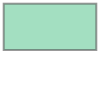

In [3]:
from vgrid.conversion.dggs2geo.maidenhead2geo  import maidenhead2geo

maidenhead_geo = maidenhead2geo(maidenhead_id)
maidenhead_geo

### Maidenhead to GeoJSON        

In [4]:
from vgrid.conversion.dggs2geo.maidenhead2geo import maidenhead2geojson

maidenhead_geojson = maidenhead2geojson(maidenhead_id)
maidenhead_geojson

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': (((106.66666666666667, 10.75),
      (106.75, 10.75),
      (106.75, 10.791666666666666),
      (106.66666666666667, 10.791666666666666),
      (106.66666666666667, 10.75)),)},
   'properties': {'maidenhead': 'OK30is',
    'resolution': 3,
    'center_lat': 10.7708333,
    'center_lon': 106.7083333,
    'cell_width': 9114.885,
    'cell_height': 4608.878,
    'cell_area': 42006510.645,
    'cell_perimeter': 27446.272}}]}

### Maidenhead Generator

Generating Maidenhead DGGS: 100%|██████████| 32400/32400 [00:03<00:00, 8238.26 cells/s] 


<Axes: >

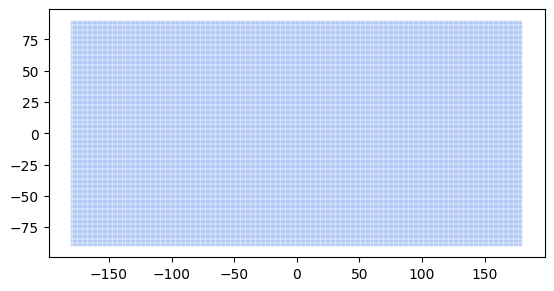

In [5]:
from vgrid.generator.maidenheadgrid import maidenheadgrid
maidenhead_grid = maidenheadgrid(resolution=2,output_format="gpd")
# maidenhead_grid = maidenheadgrid(resolution=3,bbox=[102.14,7.69,114.86,23.39],output_format="gpd")
maidenhead_grid.plot(edgecolor="#3474eb",facecolor="none",linewidth=0.1)

### Maidenhead Inspect

In [6]:
from vgrid.stats.maidenheadstats import maidenheadinspect 
resolution = 2
maidenhead_inspect = maidenheadinspect(resolution)    
maidenhead_inspect.head()

Generating Maidenhead DGGS: 100%|██████████| 32400/32400 [00:14<00:00, 2281.72 cells/s]


maidenhead  resolution  center_lat  center_lon  cell_width  cell_height  \
0       AA00           2       -89.5      -179.0       0.000   111693.865   
1       AA01           2       -88.5      -179.0    3898.456   111693.177   
2       AA02           2       -87.5      -179.0    7795.700   111691.803   
3       AA03           2       -86.5      -179.0   11690.523   111689.743   
4       AA04           2       -85.5      -179.0   15581.714   111687.001   

      cell_area  cell_perimeter  \
0  2.176892e+08      227286.185   
1  6.529959e+08      235080.510   
2  1.088088e+09      242869.828   
3  1.522823e+09      250651.722   
4  1.957057e+09      258423.779   

                                            geometry  crossed  norm_area  \
0  POLYGON ((-180 -90, -178 -90, -178 -89, -180 -...    False   0.013828   
1  POLYGON ((-180 -89, -178 -89, -178 -88, -180 -...    False   0.041479   
2  POLYGON ((-180 -88, -178 -88, -178 -87, -180 -...    False   0.069117   
3  POLYGON ((-180 -87, -178 -87, -178 -86, -180 -...    False   0.096732   
4  POLYGON ((-180 -86, -178 -86, -178 -85, -180 -...    False   0.124315   

        ipq       zsc  
0  0.052954  0.230118  
1  0.148487  0.385339  
2  0.231807  0.481463  
3  0.304592  0.551897  
4  0.368255  0.606839

### Distribution of Maidenhead Area Distortions

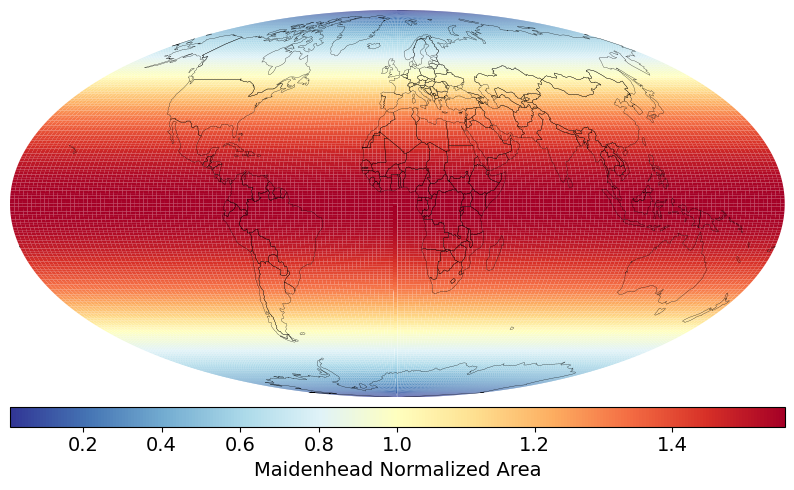

In [7]:
from vgrid.stats.maidenheadstats import maidenhead_norm_area
maidenhead_norm_area(maidenhead_inspect)

### Distribution of Maidenhead IPQ Compactness

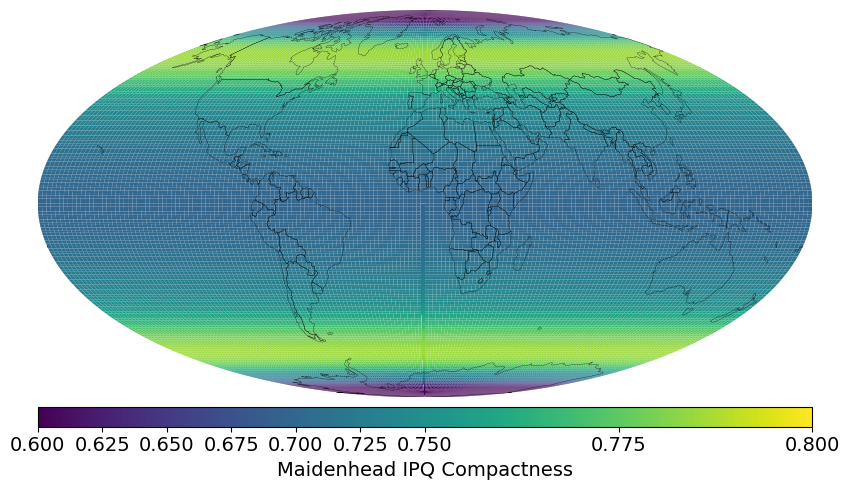

In [8]:
from vgrid.stats.maidenheadstats import maidenhead_compactness
maidenhead_compactness(maidenhead_inspect)

### Maidenhead Statistics

In [9]:
from vgrid.stats import maidenheadstats            
maidenheadstats('km')

resolution  number_of_cells  avg_edge_len_km  avg_cell_area_km2
0           1              324      1254.701805       1.574277e+06
1           2            32400       125.470181       1.574277e+04
2           3         18662400         5.227924       2.733119e+01
3           4       1866240000         0.522792       2.733119e-01